In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1tTSgGOMBnMb5eoD_gHVzYP4q4t2aJTqN'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('cancer.xlsx')
!ls -lha cancer.xlsx
!pip install -q xlrd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
df = pd.read_excel('cancer.xlsx')
df

-rw-r--r-- 1 root root 106K May 30 21:03 cancer.xlsx


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Plotting Functions
import matplotlib.pyplot as plt

#Aesthetics
!pip install seaborn --upgrade #Update Seaborn for Plotting
import seaborn as sns
sns.set_style('ticks') #No grid with ticks

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


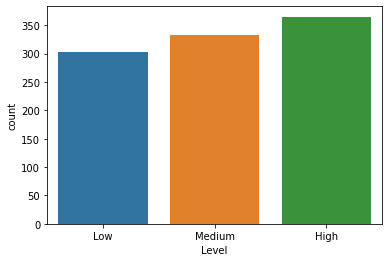

Text(0.5, 1.0, 'Data breakdown based on Gender')

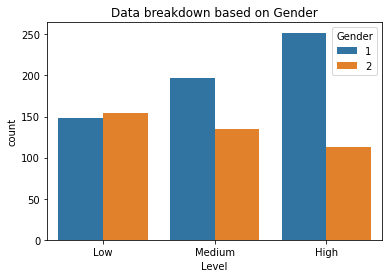

In [ ]:
fig,ax=plt.subplots()
plot=sns.countplot(data=cancer,x='Level',hue='Gender',order=["Low","Medium","High"])
ax.set_title("Data breakdown based on Gender")

Text(0.5, 1.0, 'Inter-Dependence of Alcohol use and Smoking as factors on Level of Cancer')

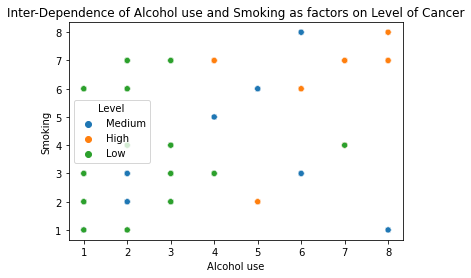

In [ ]:
fig,ax=plt.subplots()
plot=sns.scatterplot(data=cancer, x='Alcohol use',y='Smoking', hue='Level')
ax.set_title("Inter-Dependence of Alcohol use and Smoking as factors on Level of Cancer")

Text(0.5, 1.0, 'Age distribution of Patients of different levels of Cancer')

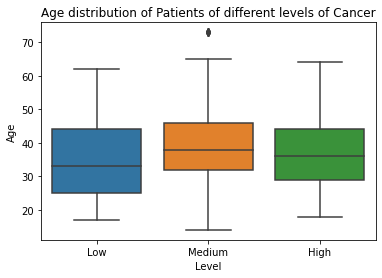

In [ ]:
fig,ax=plt.subplots()
plot=sns.boxplot(data=cancer,x="Level",y="Age",order=["Low","Medium","High"])
ax.set_title("Age distribution of Patients of different levels of Cancer")

In [ ]:
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
y=df.iloc[:,24].values
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)
y

array([1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
x=df.iloc[:,1:24].values
x

array([[33,  1,  2, ...,  2,  3,  4],
       [17,  1,  3, ...,  1,  7,  2],
       [35,  1,  4, ...,  6,  7,  2],
       ...,
       [25,  2,  4, ...,  6,  7,  2],
       [18,  2,  6, ...,  4,  2,  3],
       [47,  1,  6, ...,  6,  7,  2]])

In [ ]:
#dividing into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',max_iter=10000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0,
       2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1,
       2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1,
       2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2,
       1, 0])

In [ ]:
y_test

array([1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0,
       2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1,
       2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 2, 1,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1,
       2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2,
       1, 0])

In [ ]:
#checking accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[73,  0,  0],
       [ 0, 59,  0],
       [ 0,  0, 68]])

In [ ]:
#100% accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators=3,criterion='entropy')
classifier_rf.fit(x_train,y_train)
y_pred=classifier_rf.predict(x_test)
confusion_matrix(y_test,y_pred)


array([[73,  0,  0],
       [ 0, 59,  0],
       [ 0,  0, 68]])

In [ ]:
#check

In [ ]:
input=([[34,1,4,2,1,5,3,2,5,3,2,1,5,2,6,5,6,6,5,4,5,5,4]])

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='lbfgs',max_iter=10000)
lg.fit(x_train,y_train)
y_prein=lg.predict(input)
y_prein

array([2])